In [1]:
import pandas as pd
import datetime
import requests
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [2]:
currency_list = ["EURUSD", "GBPUSD", "USDCHF", "USDJPY", "CADJPY"]

In [3]:
def get_pd(start_date, end_date, currency_list, api_key):
    data_ret = []
    URL = "https://fxmarketapi.com/apipandas"
    for c in currency_list:
        params = {'currency' : c,
        'start_date' : '2010-04-16',
        'end_date':'2020-04-16',
        'api_key':api_key}

        response = requests.get(URL, params=params)
        df = pd.read_json(response.text)
        data_ret.append(df)
    return data_ret

In [4]:
data = get_pd('2010-04-16', '2020-04-16', currency_list, 'y0I84jnSm2Yr2CogpMqK')

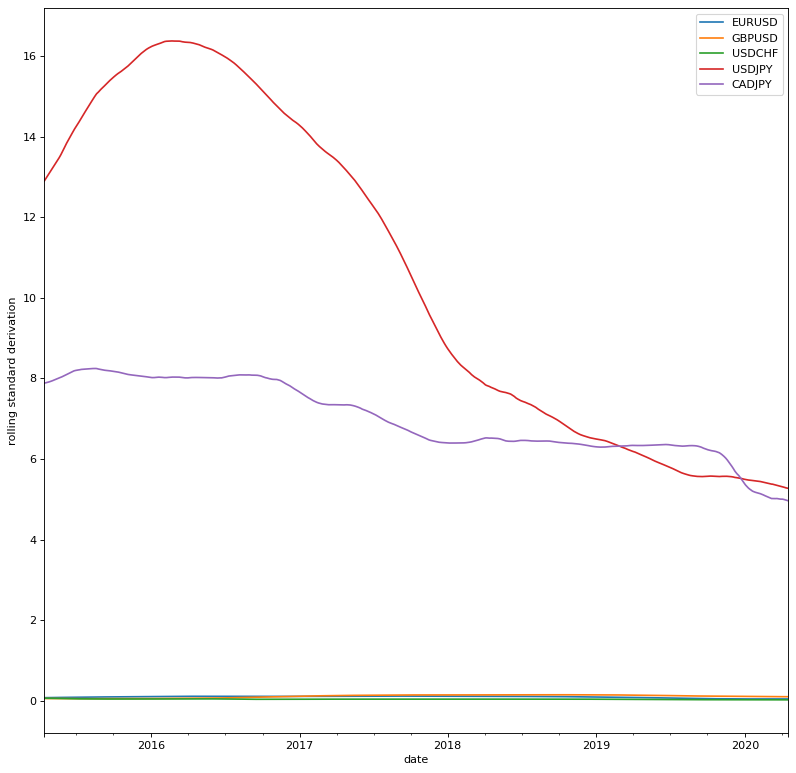

In [5]:
plt.figure(figsize=(12, 12), dpi = 80)
plt.xlabel("date")
plt.ylabel("rolling standard derivation")
for i in range(len(currency_list)):
    # rolling 5 y
    data[i]["close"].rolling(1304).std().dropna(axis=0).plot()
plt.legend(currency_list)

In [7]:
with PdfPages('output.pdf') as pdf:
    last_std = []
    corr_matrix = np.zeros((len(currency_list), len(currency_list)))
    
    plt.figure(figsize=(12, 12), dpi = 80)
    plt.xlabel("date")
    plt.ylabel("rolling standard derivations")
    for i in range(len(currency_list)):
        temp = data[i]["close"].rolling(1304).std().dropna(axis=0)
        last_std.append(temp.iloc[-1])
        temp.plot()
    plt.legend(currency_list)
    plt.title('Rolling standard deviations')
    pdf.savefig() 
    plt.close()
    
    plt.figure(figsize=(12, 12), dpi = 80)
    plt.xlabel("date")
    plt.ylabel("rolling correlations")
    corr_legend = []
    for i in range(len(currency_list)):
        corr_matrix[i][i] = 1
        for j in range(i+1, len(currency_list)):
            temp = data[i]["close"].rolling(1304).corr(data[j]["close"]).dropna(axis=0)
            corr_matrix[i][j] = temp.iloc[-1]
            corr_matrix[j][i] = temp.iloc[-1]
            temp.plot()
            corr_legend.append(currency_list[i] + "-" + currency_list[j])
    plt.legend(corr_legend)
    plt.title('Rolling correlations')
    pdf.savefig()
    plt.close()
    
    columns = currency_list
    rows = ["current std"]
    plt.figure(figsize=(12, 2), dpi = 80)
    plt.axis('tight')
    plt.axis('off')
    plt.table(cellText=[last_std],
                rowLabels=rows,
                colLabels=columns,
                loc='center')
    plt.title('Current standard deviations Table')
    pdf.savefig()
    plt.close()
    
    columns = currency_list
    rows = currency_list
    plt.figure(figsize=(12, 2), dpi = 80)
    plt.axis('tight')
    plt.axis('off')
    plt.table(cellText=corr_matrix,
                rowLabels=rows,
                colLabels=columns,
                loc='center')
    plt.title('Current correlations Matrix')
    pdf.savefig()
    plt.close()
    
    